## **UBER RIDES DATA ANALYSIS USING** **PYTHON**





Uber, the popular ride-sharing service, generates vast amounts of data every day.Uber Rides Data Analysis is a project aimed at understanding and extracting insights from Uber's ride-sharing data. By leveraging Python's powerful data analysis libraries such as Pandas, Matplotlib, and Seaborn.

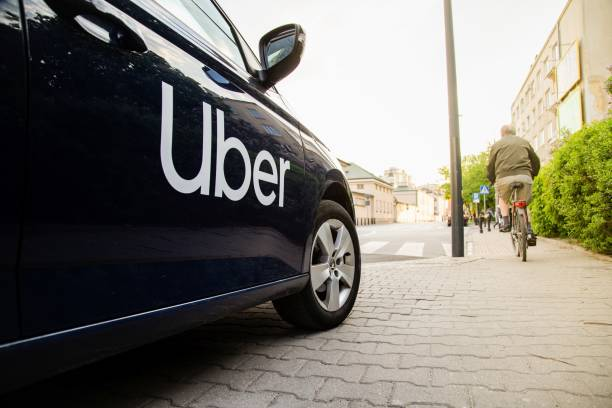

***DATA DICTIONARY***:-

**Start Time**: Timestamp indicating
the start time of the trip.

**End Time**: Timestamp indicating the end time of the trip.

**Duration**: Duration of the trip in seconds.

**Start Location**: Latitude and longitude coordinates or address of the pickup location.

**End Location**: Latitude and longitude coordinates or address of the drop-off location.

**Distance**: Distance traveled during the trip in kilometers or miles.

DATASET

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


GROUPING DATA

In [2]:
import pandas as pd

df = pd.read_csv('UberDataset.csv')

# Group by 'START_DATE' and 'END_DATE', then sum the 'MILES' column for each group
grouped_data = df.groupby(['START_DATE', 'END_DATE'])['MILES'].sum().reset_index()

# Print the resulting grouped data
print(grouped_data)


            START_DATE          END_DATE  MILES
0     01-01-2016 21:11  01-01-2016 21:17    5.1
1     01-02-2016 01:25  01-02-2016 01:37    5.0
2     01-02-2016 20:25  01-02-2016 20:38    4.8
3     01-05-2016 17:31  01-05-2016 17:45    4.7
4     01-06-2016 14:42  01-06-2016 15:49   63.7
...                ...               ...    ...
1149    9/27/2016 8:33    9/27/2016 8:35    5.8
1150   9/28/2016 17:21   9/28/2016 19:36   20.5
1151   9/29/2016 16:13   9/29/2016 18:47   12.6
1152   9/30/2016 17:39   9/30/2016 20:20   37.7
1153   9/30/2016 20:59   9/30/2016 22:34   16.7

[1154 rows x 3 columns]


CALCULATING DATA SHAPE

In [ ]:
dataset.shape

(1156, 7)

SUMMARY STATISTICS

In [ ]:
 print(dataset.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


DATA INFORMATION

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


IDENTIFY MISSING VALUES.

In [ ]:
dataset.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

PROBLEM 1:CALCULATE AVERAGE DISTANCE PER RIDE PURPOSE USING HISTOGRAM.

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64


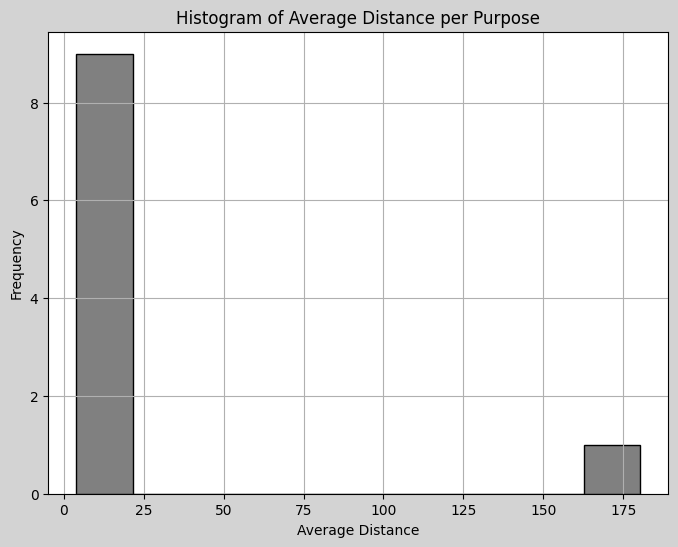

In [ ]:
avg_distance_per_purpose = dataset.groupby('PURPOSE')['MILES'].mean()
print(avg_distance_per_purpose)
avg_distances = avg_distance_per_purpose.values
# Create histogram with gray color

plt.figure(figsize=(8, 6), facecolor='lightgrey')  # Change the background color here
plt.hist(avg_distances, color='gray', bins=10, edgecolor='black')
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Average Distance per Purpose')
plt.grid(True)
plt.show()

PROBLEM 2:DETERMINE THE MOST COMMON CATEGORY OF ACTIVIES USING LINE GRAPH.

The most common category of activities is 'Business' with 1078 occurrences.


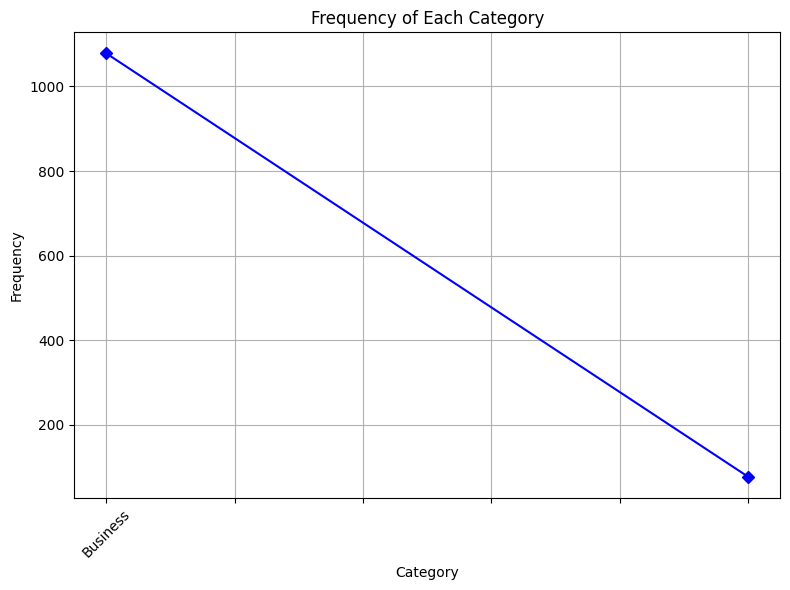

In [ ]:
# Analyze the frequency of each category
category_counts = dataset['CATEGORY'].value_counts()

# Determine the most common category
most_common_category = category_counts.idxmax()
count_most_common_category = category_counts.max()

print(f"The most common category of activities is '{most_common_category}' with {count_most_common_category} occurrences.")
# Create a line graph
plt.figure(figsize=(8, 6))
category_counts.plot(kind='line', marker='D', color='blue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PROBLEM 3 :
CALCULATE THE DURATION BETWEEN START_DATE AND END_DATE WITH HISTOGRAM.

              START_DATE            END_DATE        DURATION
0    2016-01-01 21:11:00 2016-01-01 21:17:00 0 days 00:06:00
1    2016-01-02 01:25:00 2016-01-02 01:37:00 0 days 00:12:00
2    2016-01-02 20:25:00 2016-01-02 20:38:00 0 days 00:13:00
3    2016-01-05 17:31:00 2016-01-05 17:45:00 0 days 00:14:00
4    2016-01-06 14:42:00 2016-01-06 15:49:00 0 days 01:07:00
...                  ...                 ...             ...
1151 2016-12-31 13:24:00 2016-12-31 13:42:00 0 days 00:18:00
1152 2016-12-31 15:03:00 2016-12-31 15:38:00 0 days 00:35:00
1153 2016-12-31 21:32:00 2016-12-31 21:50:00 0 days 00:18:00
1154 2016-12-31 22:08:00 2016-12-31 23:51:00 0 days 01:43:00
1155                 NaT                 NaT             NaT

[1156 rows x 3 columns]


<Axes: ylabel='Frequency'>

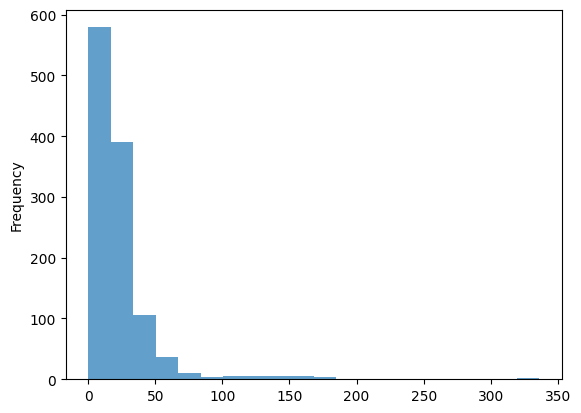

In [ ]:
import pandas as pd

dataset = pd.read_csv("UberDataset.csv")

# Convert START_DATE and END_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')
#it was showing parser error so to handle it we use this
# Calculate duration
dataset['DURATION'] = dataset['END_DATE'] - dataset['START_DATE']

# Print START_DATE, END_DATE, and DURATION columns
print(dataset[['START_DATE', 'END_DATE', 'DURATION']])
# Plot histogram of durations
dataset['DURATION'].astype('timedelta64[m]').plot(kind='hist', bins=20, alpha=0.7)
#.astype('timedelta64[m]')- This part converts the values in the 'DURATION' column to a timedelta format with minutes as the unit

PROBLEM 4:DETERMINE THE NUMBER OF ACTIVITIES UNDERTAKEN FOR EACH CATEGORY.

In [ ]:
# Use value_counts() to count the occurrences of each category
category_counts = dataset['CATEGORY'].value_counts()

print("Number of activities undertaken for each category:")
print(category_counts)




Number of activities undertaken for each category:
Business    1078
Personal      77
Name: CATEGORY, dtype: int64


 PROBLEM 5 :COUNTPLOT THE CATEGORY AND PURPOSE COLUMNS USING MATPLOTLIB AND SEABORN LIBRARY.

<ipython-input-44-760d42bb3635>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='CATEGORY', palette='pastel', alpha=0.7)
<ipython-input-44-760d42bb3635>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='PURPOSE', palette='pastel', alpha=0.7)


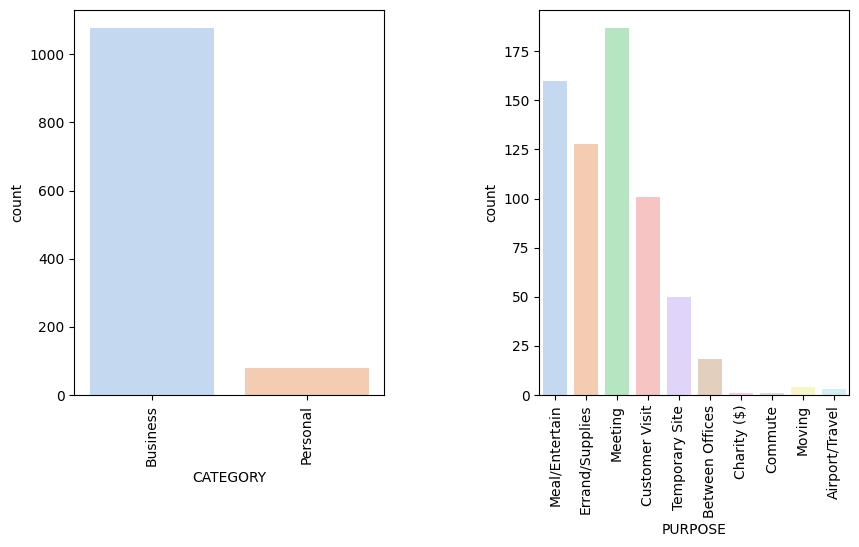

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=dataset, x='CATEGORY', palette='pastel', alpha=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=dataset, x='PURPOSE', palette='pastel', alpha=0.7)
plt.xticks(rotation=90)
# Adjust the space between subplots horizontally
plt.subplots_adjust(wspace=0.5)
plt.show()

PROBLEM 6:FIND THE CORRELATION BETWEEN THE COLUMNS USING HEATMAP.

[[45 48 65 68 68 10 84 22 37 88]
 [71 89 89 13 59 66 40 88 47 89]
 [82 38 26 78 73 10 21 81 70 80]
 [48 65 83 89 50 30 20 20 15 40]
 [33 66 10 58 33 32 75 24 36 76]
 [56 29 35  1  1 37 54  6 39 18]
 [80  5 43 59 32  2 66 42 58 36]
 [12 47 83 92  1 15 54 13 43 85]
 [76 69  7 69 48  4 77 53 79 16]
 [21 59 24 80 14 86 49 50 70 42]]


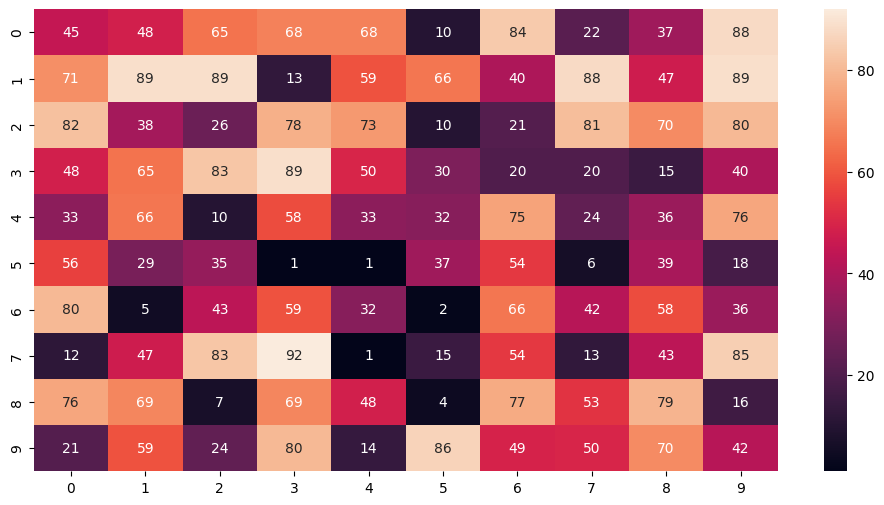

In [ ]:
plt.figure(figsize=(12,6))
# Set a fixed seed for reproducibility
np.random.seed(0)

data=np.random.randint(low=1,high=100,
                       size=(10,10))
print(data)
hm=sns.heatmap(data=data,annot=True)
plt.show()


PROBLEM 7:DETERMINE THE START TIME OF THE ACTIVITY(swarmplot).

In [ ]:
dataset = pd.read_csv("UberDataset.csv")

# Convert START_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

# Extract start time
dataset['START_TIME'] = dataset['START_DATE'].dt.time

# Print dataset with start time
print(dataset[['START_DATE', 'START_TIME', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']])

df = px.data.iris()

# Plot a swarm plot
fig = px.scatter(df, x="species", y="sepal_width", color="species", title="Swarm Plot of Species vs Sepal Width")

# Show the plot
fig.show()


              START_DATE START_TIME          END_DATE  CATEGORY  \
0    2016-01-01 21:11:00   21:11:00  01-01-2016 21:17  Business   
1    2016-01-02 01:25:00   01:25:00  01-02-2016 01:37  Business   
2    2016-01-02 20:25:00   20:25:00  01-02-2016 20:38  Business   
3    2016-01-05 17:31:00   17:31:00  01-05-2016 17:45  Business   
4    2016-01-06 14:42:00   14:42:00  01-06-2016 15:49  Business   
...                  ...        ...               ...       ...   
1151 2016-12-31 13:24:00   13:24:00  12/31/2016 13:42  Business   
1152 2016-12-31 15:03:00   15:03:00  12/31/2016 15:38  Business   
1153 2016-12-31 21:32:00   21:32:00  12/31/2016 21:50  Business   
1154 2016-12-31 22:08:00   22:08:00  12/31/2016 23:51  Business   
1155                 NaT        NaT               NaN       NaN   

                 START              STOP    MILES          PURPOSE  
0          Fort Pierce       Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce       Fort Pierce      5.0        

PROBLEM 8:DETERMINE THE END TIME OF THE ACTIVITY.

In [ ]:
# Access the 'END_DATE' column to determine the end time of the activity
end_times = dataset['END_DATE']

# Print the end times
print("End times of activities:")
print(end_times)


End times of activities:
0       01-01-2016 21:17
1       01-02-2016 01:37
2       01-02-2016 20:38
3       01-05-2016 17:45
4       01-06-2016 15:49
              ...       
1151    12/31/2016 13:42
1152    12/31/2016 15:38
1153    12/31/2016 21:50
1154    12/31/2016 23:51
1155                 NaN
Name: END_DATE, Length: 1156, dtype: object


PROBLEM 9:IDENTIFY THE ACTIVITY WITH SHORTEST DURATION USING CATPLOT(VIOLIN).

In [ ]:
# Read the dataset
dataset = pd.read_csv("UberDataset.csv")

# Convert START_DATE and END_DATE to datetime objects with error handling
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

# Drop rows with NaT values in either START_DATE or END_DATE
dataset = dataset.dropna(subset=['START_DATE', 'END_DATE'])

# Calculate the duration of each activity
dataset['DURATION'] = dataset['END_DATE'] - dataset['START_DATE']

# Find the activity with the shortest duration
shortest_duration_activity = dataset.loc[dataset['DURATION'].idxmin()]

# Print information about the activity with the shortest duration
print("Activity with the shortest duration:")
print(shortest_duration_activity)

df = px.data.iris()

# Plot a violin plot
fig = px.violin(df, y='sepal_width', x='species', box=True, points="all", title='Distribution of Sepal Width by Species')

# Show the plot
fig.show()


Activity with the shortest duration:
START_DATE    2016-09-06 17:49:00
END_DATE      2016-09-06 17:49:00
CATEGORY                 Business
START            Unknown Location
STOP             Unknown Location
MILES                        69.1
PURPOSE                       NaN
DURATION          0 days 00:00:00
Name: 751, dtype: object


<ipython-input-8-206a4ee990fb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



PROBLEM 10:DETERMINE THE PURPOSE OF THE ACTIVITY WITH THE HIGHEST NUMBER OF MILES COVERED.

In [ ]:
# Find the row with the highest number of miles covered
max_miles_row = dataset[dataset['MILES'] == dataset['MILES'].max()]

# Extract the purpose of the activity with the highest number of miles covered
purpose_highest_miles = max_miles_row['PURPOSE'].iloc[0]

print("Purpose of the activity with the highest number of miles covered:", purpose_highest_miles)


Purpose of the activity with the highest number of miles covered: nan


PROBLEM 11:DETERMINE THE TOTAL DISTANCE COVERED FOR EACH CATEGORY OF ACTIVIES WITH SCATTERPLOT WITH COLOR AND SIZE MAPPING.

Total distance covered for each purpose of activities:
PURPOSE
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES, dtype: float64


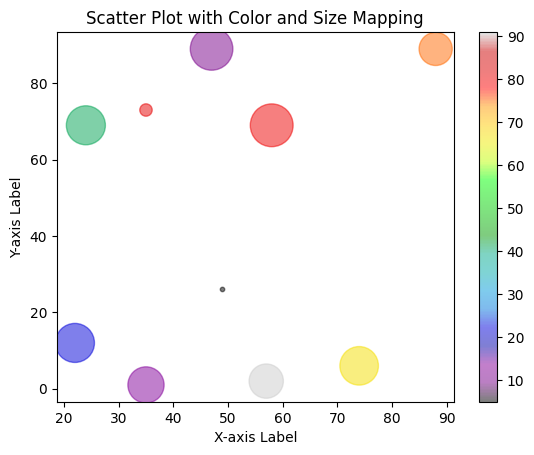

In [ ]:
import pandas as pd
dataset = pd.read_csv("UberDataset.csv")

# Group the data by 'PURPOSE' and sum the 'MILES' for each purpose
total_distance_by_purpose = dataset.groupby('PURPOSE')['MILES'].sum()

print("Total distance covered for each purpose of activities:")
print(total_distance_by_purpose)

# Generate random data for scatter plot (replace this with your actual data)
a = np.random.randint(100, size=(len(total_distance_by_purpose)))
b = np.random.randint(100, size=(len(total_distance_by_purpose)))
colors = np.random.randint(100, size=(len(total_distance_by_purpose)))
sizes = 10 * np.random.randint(100, size=(len(total_distance_by_purpose)))

# Create the scatter plot
plt.scatter(a, b, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.colorbar()
plt.title('Scatter Plot with Color and Size Mapping')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


In [ ]:
# Group the data by 'PURPOSE' and sum the 'MILES' for each purpose
total_distance_by_purpose = dataset.groupby('PURPOSE')['MILES'].sum()

print("Total distance covered for each purpose of activities:")
print(total_distance_by_purpose)



Total distance covered for each purpose of activities:
PURPOSE
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES, dtype: float64


PROBLEM 12:CALCULATE THE TOTAL NUMBER OF HOURS SPENT DURING THE ACTIVITY WITH BAR GRAPH.

Total hours spent during the activity: 447.43333333333334


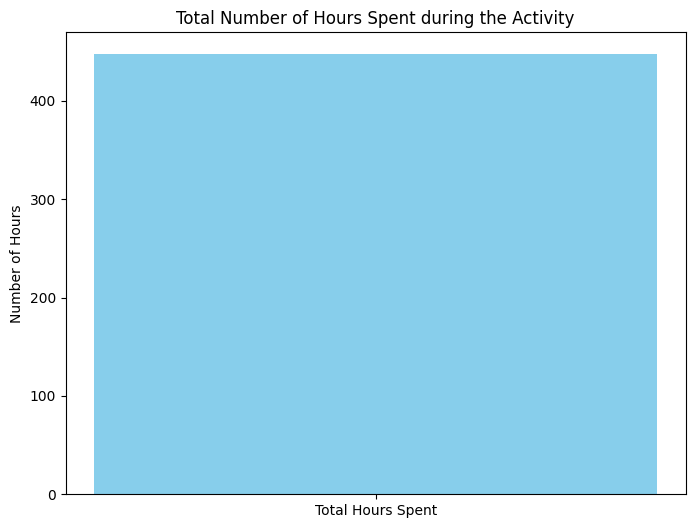

In [ ]:
import pandas as pd

dataset = pd.read_csv("UberDataset.csv")

# Filter out rows containing "Totals" value
dataset = dataset[~dataset['START_DATE'].fillna('').str.contains('Totals') & ~dataset['END_DATE'].fillna('').str.contains('Totals')]
#.fillna(''): This fills missing values (NaN) in the "END_DATE" column with an empty string.
#.str.contains('Totals'):returns a boolean Series
# Convert START_DATE and END_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'])

# Calculate duration for each trip in hours
dataset['DURATION'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 3600

# Calculate total duration in hours
total_duration_hours = dataset['DURATION'].sum()

# Print total number of hours spent during the activity
print("Total hours spent during the activity:", total_duration_hours)
# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Total Hours Spent'], [total_duration_hours], color='skyblue')
plt.ylabel('Number of Hours')
plt.title('Total Number of Hours Spent during the Activity')
plt.show()

PROBLEM 13:CALCULATE THE SPEED (MILES PER HOUR ) DURING THE ACTIVITY.

In [ ]:
import pandas as pd


dataset = pd.read_csv("UberDataset.csv")

# Filter out rows containing "Totals" value
dataset = dataset[~dataset['START_DATE'].fillna('').str.contains('Totals') & ~dataset['END_DATE'].fillna('').str.contains('Totals')]

# Convert START_DATE and END_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'])

# Calculate duration for each trip in hours
dataset['DURATION'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 3600

# Calculate speed (miles per hour) during the activity
dataset['SPEED'] = dataset['MILES'] / dataset['DURATION']

# Print the resulting dataframe with speed
print(dataset[['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE', 'SPEED']])


              START_DATE            END_DATE  CATEGORY             START  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                  STOP  MILES          PURPOSE      SPEED  
0          Fort Pierce    5

PROBLEM 14:CALCULATE THE TOTAL NUMBER OF DAYS BETWEEN START_DATE AND END_DATE.

In [ ]:

dataset = pd.read_csv("UberDataset.csv")

# Filter out rows containing "Totals" value in both START_DATE and END_DATE columns
dataset = dataset[~dataset['START_DATE'].str.contains('Totals', na=False) & ~dataset['END_DATE'].str.contains('Totals', na=False)]

# Convert START_DATE and END_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

# Drop rows with NaT values (invalid datetime after coercion)
dataset = dataset.dropna(subset=['START_DATE', 'END_DATE'])

# Calculate the duration in days between START_DATE and END_DATE
dataset['DURATION_DAYS'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.days
# Print the distribution of the number of days
print("Distribution of Duration Between START_DATE and END_DATE:")
print(dataset['DURATION_DAYS'].describe())


Distribution of Duration Between START_DATE and END_DATE:
count    1155.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DURATION_DAYS, dtype: float64


PROBLEM 15:IDENTIFY THE ACTIVITIES THAT LASTED FOR MORE THAN A WEEK.

In [ ]:

dataset = pd.read_csv("UberDataset.csv")

# Convert START_DATE and END_DATE to strings
dataset['START_DATE'] = dataset['START_DATE'].astype(str)
dataset['END_DATE'] = dataset['END_DATE'].astype(str)

# Filter out rows containing "Totals" value
dataset = dataset[~dataset['START_DATE'].str.contains('Totals') & ~dataset['END_DATE'].str.contains('Totals')]

# Convert START_DATE and END_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

# Drop rows with NaT values (invalid datetime after coercion)
dataset = dataset.dropna(subset=['START_DATE', 'END_DATE'])

# Calculate the duration of each activity in hours
dataset['DURATION_HOURS'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 3600

# Filter activities that lasted for more than a week (168 hours)
activities_more_than_week = dataset[dataset['DURATION_HOURS'] > 168]
print(activities_more_than_week)

Empty DataFrame
Columns: [START_DATE, END_DATE, CATEGORY, START, STOP, MILES, PURPOSE, DURATION_HOURS]
Index: []


PROBLEM 16:CALCULATE THE AVERAGE SPEED DURING THE ACTIVITY.


Average speed during the activity: 27.27713625866051 miles per hour


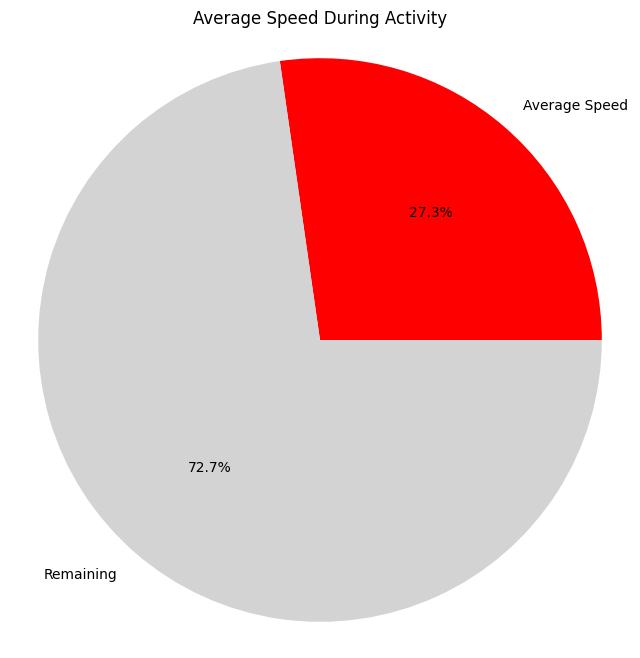

In [ ]:

dataset = pd.read_csv("UberDataset.csv")

# Fill missing values with an empty string
dataset['START_DATE'] = dataset['START_DATE'].fillna('')
dataset['END_DATE'] = dataset['END_DATE'].fillna('')

# Filter out rows containing "Totals" value
dataset = dataset[~dataset['START_DATE'].str.contains('Totals') & ~dataset['END_DATE'].str.contains('Totals')]

# Convert START_DATE and END_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

# Drop rows with NaT values (invalid datetime after coercion)
dataset = dataset.dropna(subset=['START_DATE', 'END_DATE'])

# Calculate the duration of each activity in hours
dataset['DURATION_HOURS'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 3600

# Calculate the total distance covered during all activities
total_distance = dataset['MILES'].sum()

# Calculate the total duration of all activities
total_duration = dataset['DURATION_HOURS'].sum()

# Calculate the average speed during the activity
average_speed = total_distance / total_duration

print("Average speed during the activity:", average_speed, "miles per hour")
# Create a pie chart
labels = ['Average Speed', 'Remaining']
sizes = [average_speed, 100 - average_speed]
colors = ['red', 'lightgray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Average Speed During Activity')
plt.axis('equal')
plt.show()
#if we want to have different segements and explode them outwards we use lavels and explore

PROBLEM 17:IDENTIFY THE MOST COMMON PURPOSES FOR UBER RIDES.

In [ ]:

dataset = pd.read_csv("UberDataset.csv")

# Filter out rows containing "Totals" value in the PURPOSE column
dataset = dataset[~dataset['PURPOSE'].str.contains('Totals', na=False)]

# Group the data by 'PURPOSE' and count the occurrences of each purpose
common_purposes = dataset['PURPOSE'].value_counts()

print("Most common purposes for Uber rides:")
print(common_purposes)


Most common purposes for Uber rides:
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


PROBLEM 18:IDENTIFY THE BUSIEST HOUR FOR UBER RIDES WITH GRAPH

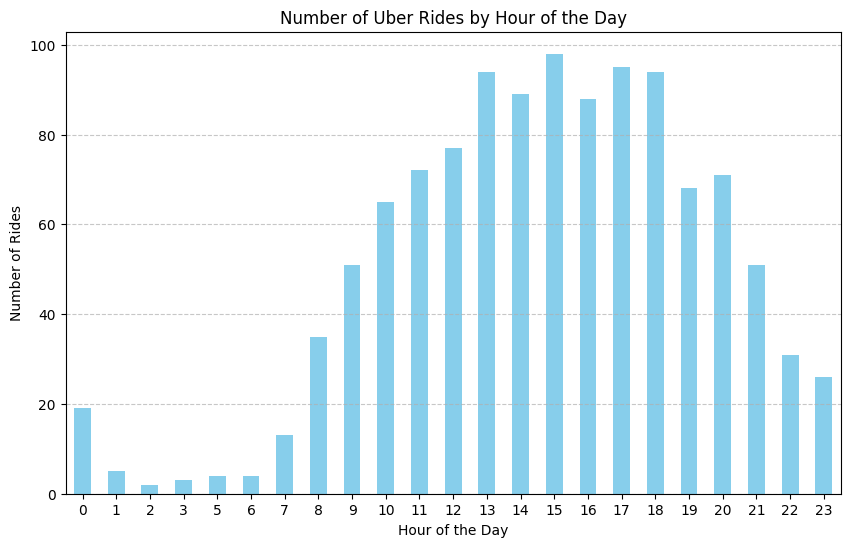

In [ ]:

dataset = pd.read_csv("UberDataset.csv")

# Filter out rows containing "Totals" value in the START_DATE column
dataset = dataset[~dataset['START_DATE'].str.contains('Totals', na=False)]

# Convert START_DATE to datetime objects
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

# Drop rows with NaT values (invalid datetime after coercion)
dataset = dataset.dropna(subset=['START_DATE'])

# Extract the hour from the START_DATE column
dataset['HOUR'] = dataset['START_DATE'].dt.hour

# Group the data by hour and count the number of rides for each hour
rides_by_hour = dataset.groupby('HOUR').size()

# Plot a bar chart to visualize the distribution of rides by hour
plt.figure(figsize=(10, 6))
rides_by_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Uber Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


PROBLEM 19:DETERMINE THE AVERAGE WAITING TIME FOR UBER RIDES.

In [ ]:

dataset = pd.read_csv("UberDataset.csv")

# Filter out rows containing "Totals" value in the START_DATE column
dataset = dataset[~dataset['START_DATE'].str.contains('Totals', na=False)]

# Convert the 'START_DATE' and 'END_DATE' columns to datetime format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'])

# Calculate the waiting time for each ride
dataset['Waiting_Time'] = dataset['END_DATE'] - dataset['START_DATE']

# Convert waiting time to seconds for easier manipulation
dataset['Waiting_Time_seconds'] = dataset['Waiting_Time'].dt.total_seconds()

# Calculate the average waiting time
average_waiting_time_seconds = dataset['Waiting_Time_seconds'].mean()

# Convert the average waiting time from seconds to minutes for better readability
average_waiting_time_minutes = average_waiting_time_seconds / 60

print("Average waiting time for Uber rides: {:.2f} minutes".format(average_waiting_time_minutes))


Average waiting time for Uber rides: 23.24 minutes


PROBLEM 20:COMPARE THE DISTRIBUTION OF UBER RIDES BETWEEN WEEKDAYS AND WEEKENDS WITH BAR GRAPH.

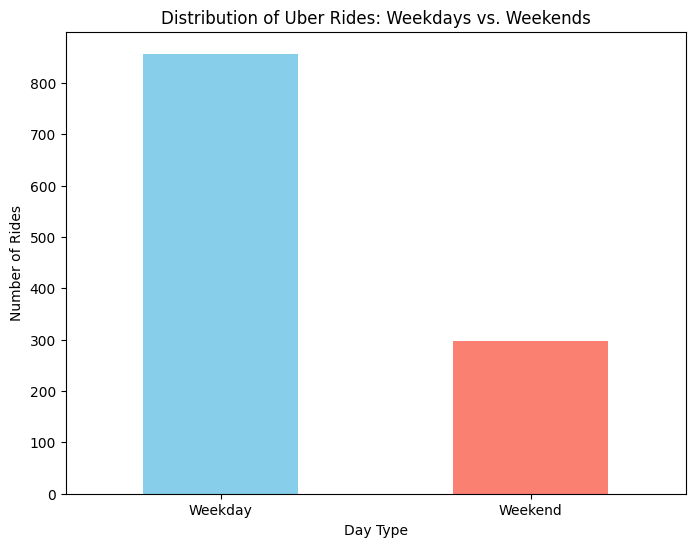

In [ ]:

dataset = pd.read_csv("UberDataset.csv")

# Filter out rows containing "Totals" value in the START_DATE column
dataset = dataset[~dataset['START_DATE'].str.contains('Totals', na=False)]

# Convert the 'START_DATE' column to datetime format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])

# Extract the day of the week from the 'START_DATE' column (0=Monday, 6=Sunday)
dataset['Day_of_week'] = dataset['START_DATE'].dt.dayofweek

# Map the day of the week to 'Weekday' or 'Weekend'
dataset['Day_type'] = dataset['Day_of_week'].map({0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'})

# Group the data by the 'Day_type' column and count the number of rides for each category
ride_distribution = dataset['Day_type'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
ride_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Uber Rides: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.show()

